# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=200) #size=1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 139


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | yamba
City not found. Skipping...
Processing Record 5 of Set 1 | pontes e lacerda
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | viedma
Processing Record 8 of Set 1 | la mira
Processing Record 9 of Set 1 | ta`u
Processing Record 10 of Set 1 | amga
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tevriz
Processing Record 15 of Set 1 | altamont
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | liski
Processing Record 21 of Set 1 | xam nua
Pro

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          134
Lat           134
Lng           134
Max Temp      134
Humidity      134
Cloudiness    134
Wind Speed    134
Country       134
Date          134
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,9.43,54,{'all': 5},2.93,GS,1738079249
1,yellowknife,62.4560,-114.3525,-12.71,85,{'all': 100},3.60,CA,1738079272
2,edinburgh of the seven seas,-37.0676,-12.3116,16.22,75,{'all': 100},11.72,SH,1738079273
3,pontes e lacerda,-15.2261,-59.3353,34.67,43,{'all': 20},2.07,BR,1738079277
4,geraldton,-28.7667,114.6000,25.23,78,{'all': 89},2.06,AU,1738079278


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/joseignacio/Desktop/python-api-challenge/WeatherPy/Resources/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("/Users/joseignacio/Desktop/python-api-challenge/WeatherPy/Resources/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,9.43,54,5,2.93,GS,1738079249
1,yellowknife,62.4560,-114.3525,-12.71,85,100,3.60,CA,1738079272
2,edinburgh of the seven seas,-37.0676,-12.3116,16.22,75,100,11.72,SH,1738079273
3,pontes e lacerda,-15.2261,-59.3353,34.67,43,20,2.07,BR,1738079277
4,geraldton,-28.7667,114.6000,25.23,78,89,2.06,AU,1738079278


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

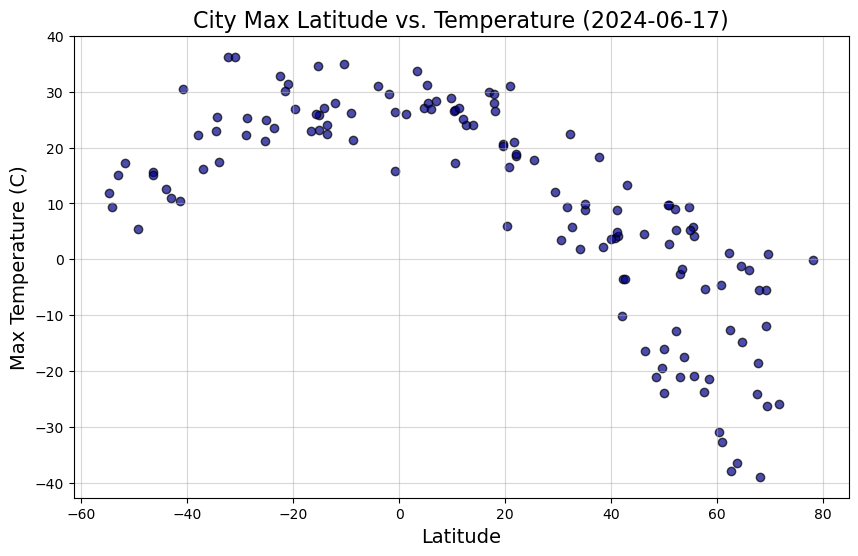

In [87]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='darkblue', alpha=0.7, edgecolor='k', label='City Data')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)

plt.grid(True, linestyle='-', alpha=0.5)
# Save the figure
plt.savefig("/Users/joseignacio/Desktop/python-api-challenge/WeatherPy/figures/Latitude vs Temperature")

# Show plot
plt.show()

#### Latitude Vs. Humidity

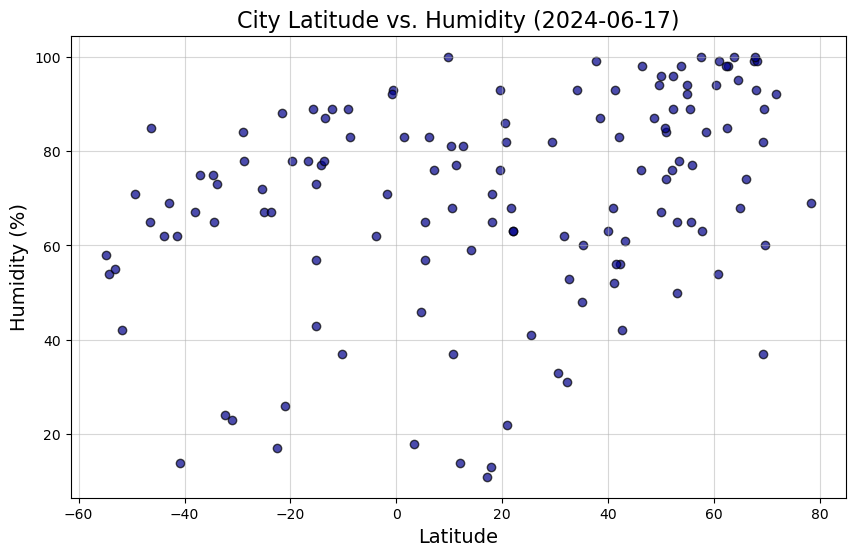

In [90]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='darkblue', alpha=0.7, edgecolor='k', label='City Data')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)

plt.grid(True, linestyle='-', alpha=0.5)

# Save the figure
plt.savefig("/Users/joseignacio/Desktop/python-api-challenge/WeatherPy/figures/Latitude vs Humidity")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

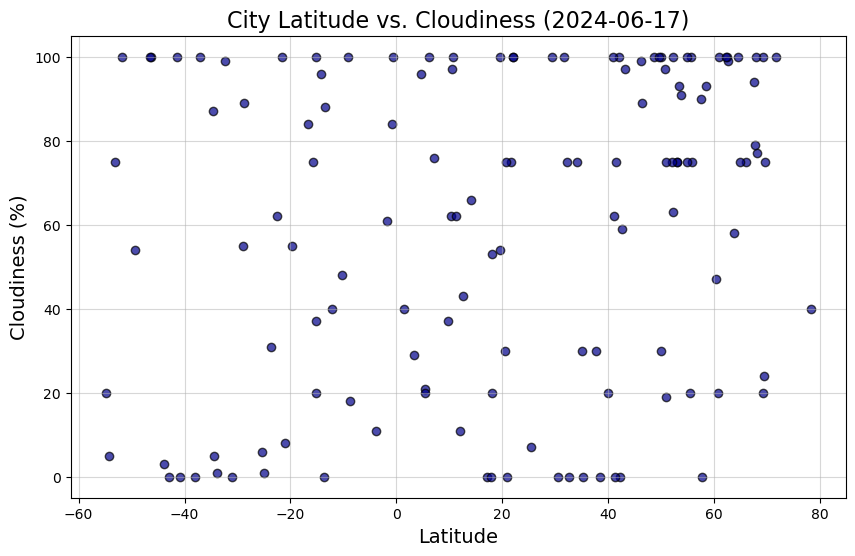

In [93]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='darkblue', alpha=0.7, edgecolor='k', label='City Data')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)

plt.grid(True, linestyle='-', alpha=0.5)
# Save the figure
plt.savefig("/Users/joseignacio/Desktop/python-api-challenge/WeatherPy/figures/Latitude Vs Cloudiness")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

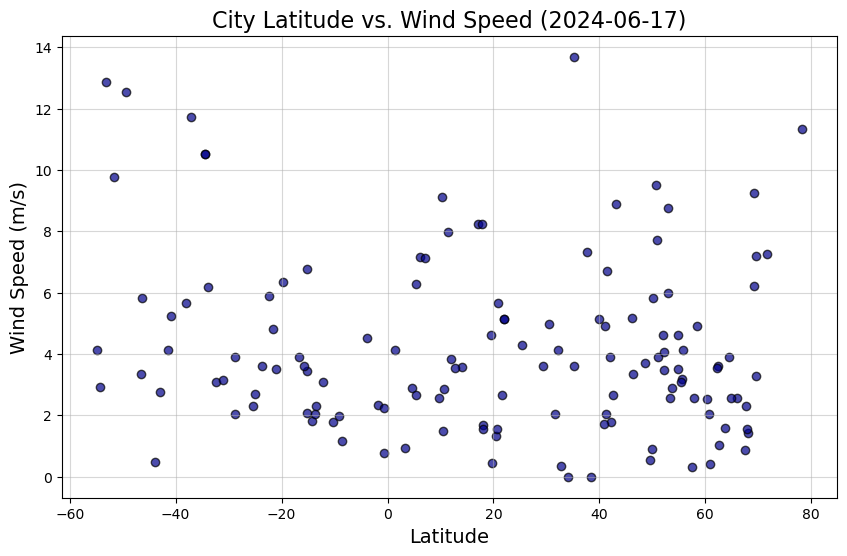

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='darkblue', alpha=0.7, edgecolor='k', label='City Data')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)

plt.grid(True, linestyle='-', alpha=0.5)
# Save the figure
plt.savefig("/Users/joseignacio/Desktop/python-api-challenge/WeatherPy/figures/Latitude vs Wind Speed Plot")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [349]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, title, xlabel, ylabel, hemisphere):
 
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x, y)
    
    # regression line
    regression_line = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    #scatter [lot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color="blue", alpha=0.7, edgecolor="k")
    plt.plot(x, regression_line, color="red")
    plt.title(f"{title}", fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # regression equation to the plot
    plt.text(
        x.min() + (x.max() - x.min()) * 0.1,  
        y.max() - (y.max() - y.min()) * 0.9,  
        line_eq, color="red", fontsize=12
    )
    
    plt.show()
    print(f"The r^2-value is: {r_value**2:.2f}")

In [351]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-12.71,85,100,3.60,CA,1738079272
6,la mira,18.0350,-102.3266,26.47,71,53,1.68,MX,1738079280
8,amga,60.8953,131.9608,-32.62,99,100,0.41,RU,1738079282
9,thompson,55.7435,-97.8558,-20.91,77,75,4.12,CA,1738079283
12,tevriz,57.5090,72.4042,-23.66,100,90,0.33,RU,1738079286


In [353]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,9.43,54,5,2.93,GS,1738079249
2,edinburgh of the seven seas,-37.0676,-12.3116,16.22,75,100,11.72,SH,1738079273
3,pontes e lacerda,-15.2261,-59.3353,34.67,43,20,2.07,BR,1738079277
4,geraldton,-28.7667,114.6000,25.23,78,89,2.06,AU,1738079278
5,viedma,-40.8135,-62.9967,30.51,14,0,5.23,AR,1738079279


###  Temperature vs. Latitude Linear Regression Plot

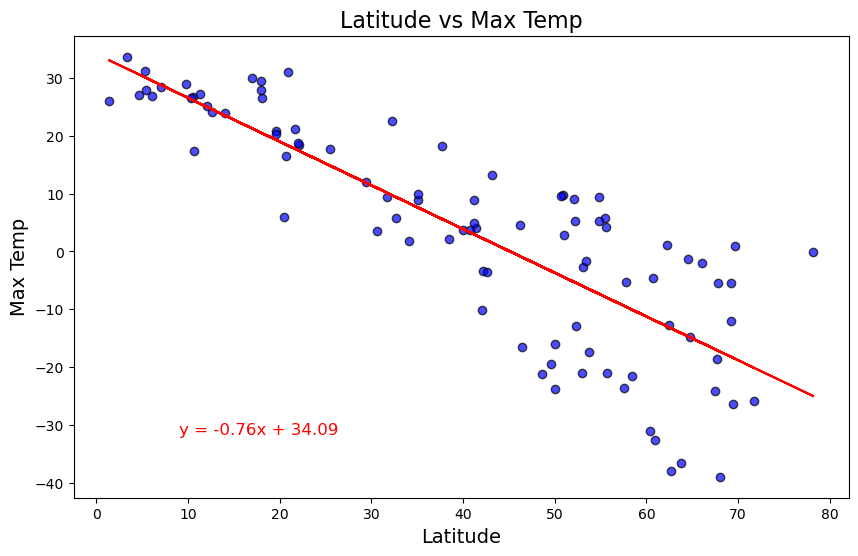

The r^2-value is: 0.69


In [356]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"], 
    y=northern_hemi_df["Max Temp"], 
    title="Latitude vs Max Temp", 
    xlabel="Latitude", 
    ylabel="Max Temp", 
    hemisphere="Northern Hemisphere"
)

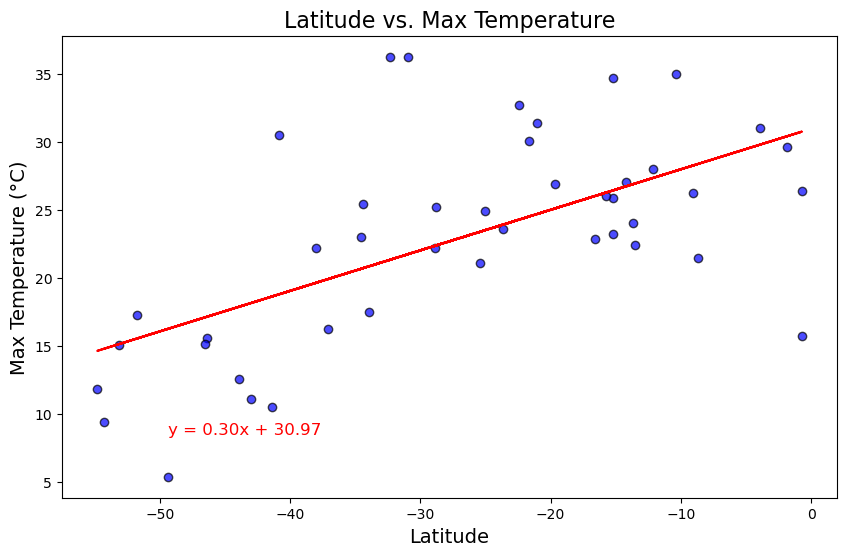

The r^2-value is: 0.37


In [358]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"], 
    y=southern_hemi_df["Max Temp"], 
    title="Latitude vs. Max Temperature", 
    xlabel="Latitude", 
    ylabel="Max Temperature (°C)", 
    hemisphere="Southern Hemisphere"
)

**Discussion about the linear relationship:** 

**Southern Hemisphere**

The plot shows a positive correlation, as latitude increases (moving northward), max tempertures also tends to increase. However, the R^2 value of 0.37 suggests that latitude is not the only factor affecting temperture. 

* 0.30 (Slope)
This tell us hoc much temperture changes when latitude changes. Every time latitud increases by 1 degree, the tempeture increases by 0.30 C

* 30.97C (Intercept)
This is where the line starts when the latitude x=0 (Equator), meaning that at the equator, the expected maximum temperture is 30.97


**Northern Hemisphere**

r^2 0.69% means 69% of variation in temperture is explained by latitude. This is a stronger correlation than the Southern hemisphere graph where r^2 is 0.37, meaning latitude plays a bigger role in determining temperture here.

* -0.76 (Negative Slope)
This means as latitude increases (moving northward), the max temperture decreases. The farther is from the equator, the colder it gets.

* 34.09C (intercept)
At latitude 0(Equator), the estimated max temp is 34.09C. This make sense since areas near the Equator are normally hotter.


### Humidity vs. Latitude Linear Regression Plot

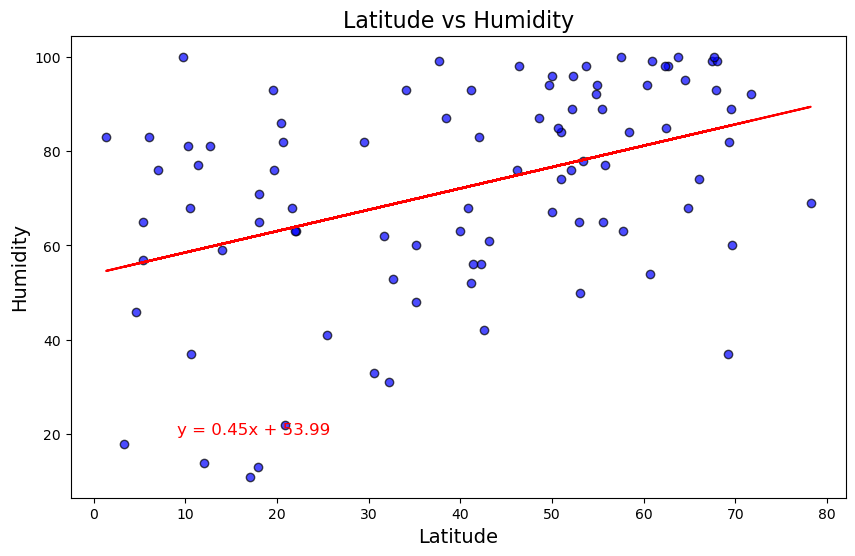

The r^2-value is: 0.17


In [363]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"], 
    y=northern_hemi_df["Humidity"], 
    title="Latitude vs Humidity", 
    xlabel="Latitude", 
    ylabel="Humidity", 
    hemisphere="Northern Hemisphere"
)

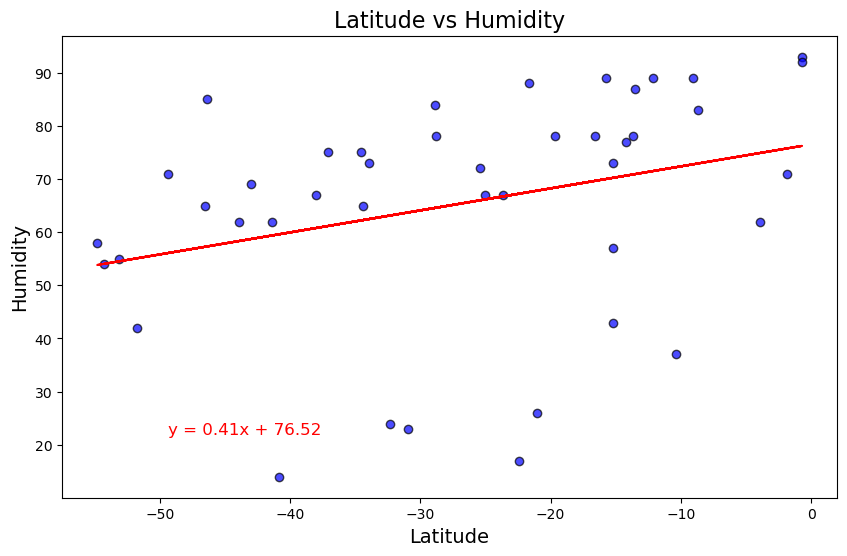

The r^2-value is: 0.10


In [367]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"], 
    y=southern_hemi_df["Humidity"], 
    title="Latitude vs Humidity", 
    xlabel="Latitude", 
    ylabel="Humidity", 
    hemisphere="Southern Hemisphere"
)

**Discussion about the linear relationship:** 

**Northern Hemisphere**

The plot shows a moderate positive correlation, indicating that as latitude increases (moving northward), humidity tends to increase.

The r^2 value of 0.17 suggests that 17% of the variation in humidity can be explained by latitude. This indicates that while latitude has some effect on humidity, it suggests that latitude is not the only factor affecting temperture.

0.45 (Slope) means that for every one degree increase in latitude, humidity increases by 0.45% on average.
This suggests that regions farther north in the Northern Hemisphere tend to be slightly more humid, possibly due to seasonal variations or proximity to the Arctic Ocean or forested regions.

53.99% (Intercept) represents the estimated humidity when latitude = 0 (at the Equator). At the Equator, the expected humidity is around 53.99%. Which tend to be humid due to high temperatures and consistent rainfall.

**Southern Hemisphere**

The plot shows a weak positive correlation, suggesting that as latitude increases (moving northward from the Southern Hemisphere towards the Equator), humidity tends to increase slightly.

The r^2 value of 0.10 indicates that only 10% of the variation in humidity can be explained by latitude. This is a very weak correlation, implying that other factors such as local weather patterns and regional climates play a much more significant role in determining humidity levels.

0.41 (Slope) means that for every one degree increase in latitude, humidity increases by 0.41% on average.
While the slope shows a slight upward trend, the small magnitude and low r^2 suggest that this change is not substantial and that latitude alone is not a strong factor in influencing humidity.

76.52% (intercept) represents the estimated humidity when latitude = 0 (at the Equator). At the Equator, the expected humidity is around 76.52%. This is consistent with typical equatorial climates, where high humidity is common due to warm temperatures, high evaporation rates, and frequent rainfall.

### Cloudiness vs. Latitude Linear Regression Plot

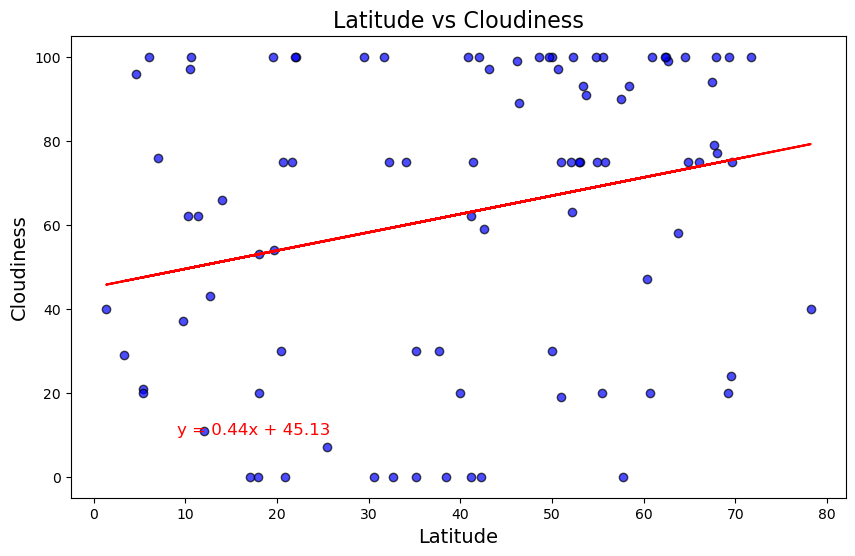

The r^2-value is: 0.06


In [388]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"], 
    y=northern_hemi_df["Cloudiness"], 
    title="Latitude vs Cloudiness", 
    xlabel="Latitude", 
    ylabel="Cloudiness", 
    hemisphere="Northern Hemisphere"
)

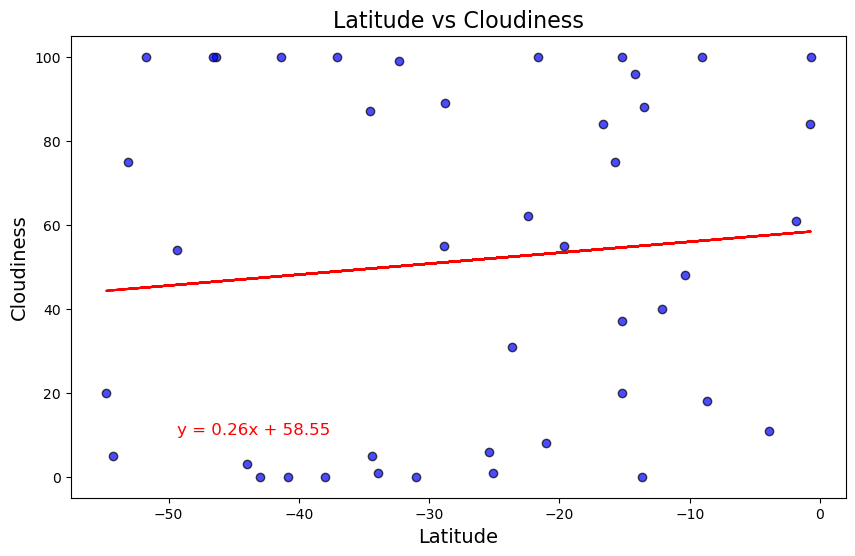

The r^2-value is: 0.01


In [390]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"], 
    y=southern_hemi_df["Cloudiness"], 
    title="Latitude vs Cloudiness", 
    xlabel="Latitude", 
    ylabel="Cloudiness", 
    hemisphere="Southern Hemisphere"
)

**Discussion about the linear relationship:** 

**Northern Hemisphere**

The plot shows a very weak positive correlation, indicating that as latitude increases (moving northward), cloudiness tends to increase slightly.

The  r^2 value of 0.06 suggests that only 6% of the variation in cloudiness can be explained by latitude. This indicates that while latitude has a minimal effect on cloudiness, other factors such as local weather patterns, geographical features, and seasonal variations play a much larger role in determining cloudiness.

0.44 (Slope) means that for every one degree increase in latitude, cloudiness increases by 0.44% on average. This suggests that regions farther north in the Northern Hemisphere may experience slightly more cloud cover, possibly due to cooler temperatures.

45.13% (Intercept) represents the estimated cloudiness when latitude = 0 (at the Equator). At the Equator, the expected cloudiness is around 45.13%. While equatorial regions are typically cloudy due to frequent rainfall and high evaporation rates, this lower value might reflect regional variations or the specific dataset used.

**Southern Hemisphere**

The plot shows a very weak positive correlation, indicating that as latitude increases (moving northward toward the Equator), cloudiness tends to increase slightly. However, the trend is minimal and may not be significant.

The  r^2 value of 0.01 suggests that only 1% of the variation in cloudiness can be explained by latitude. This indicates that latitude has almost no effect on cloudiness in the Southern Hemisphere. Other factors such as local weather systems, proximity to oceans, altitude, and regional climate patterns are likely to have a much stronger influence.

0.26 (Slope) means that for every one degree increase in latitude, cloudiness increases by 0.26% on average. This suggests a very slight upward trend, but it is not substantial enough to conclude a meaningful relationship.

58.55% (Intercept) represents the estimated cloudiness when latitude = 0 (at the Equator). At the Equator, the expected cloudiness is around 58.55%. This is a moderate cloudiness level, though equatorial regions typically experience higher cloud cover due to consistent convection and rainfall. The relatively lower intercept may reflect regional differences or variations in the dataset.


### Wind Speed vs. Latitude Linear Regression Plot

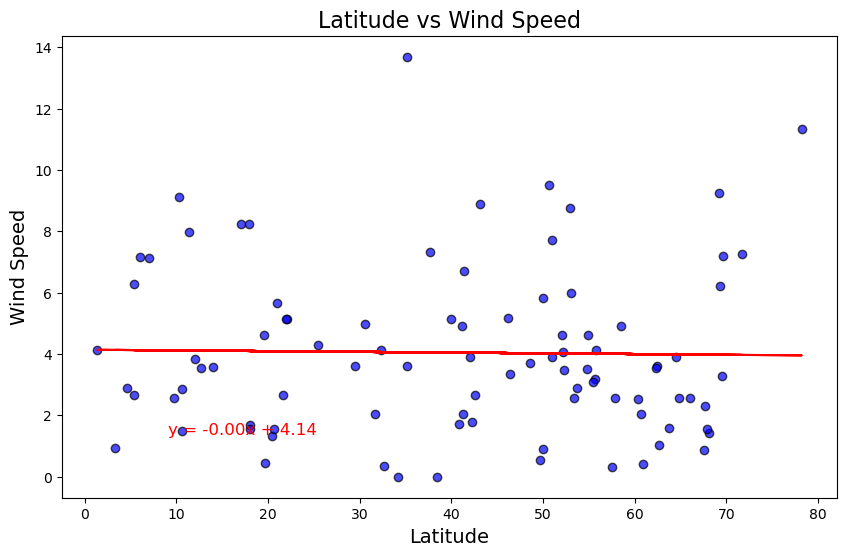

The r^2-value is: 0.00


In [405]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"], 
    y=northern_hemi_df["Wind Speed"], 
    title="Latitude vs Wind Speed", 
    xlabel="Latitude", 
    ylabel="Wind Speed", 
    hemisphere="Northern Hemisphere"
)


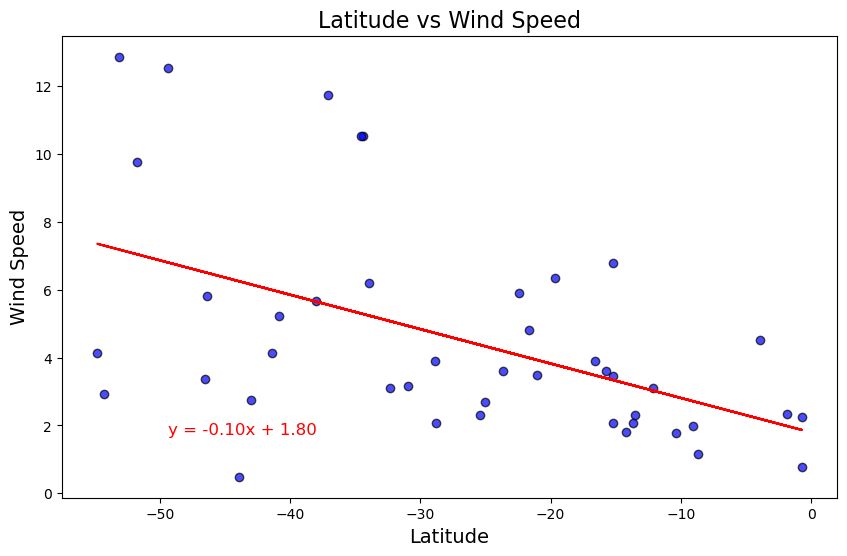

The r^2-value is: 0.25


In [407]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"], 
    y=southern_hemi_df["Wind Speed"], 
    title="Latitude vs Wind Speed", 
    xlabel="Latitude", 
    ylabel="Wind Speed", 
    hemisphere="Southern Hemisphere"
)


**Discussion about the linear relationship:** 

**Northern Hemisphere**

The plot shows no meaningful correlation between latitude and wind speed in the Northern Hemisphere. The data points are widely scattered, and the regression line is nearly flat, indicating no significant trend.

The r^2 value of 0.00 suggests that 0% of the variation in wind speed can be explained by latitude. This means that latitude has no measurable effect on wind speed in the dataset.

-0.00 (Slope) means that for every one degree increase in latitude, wind speed decreases by an imperceptible amount (essentially zero). This indicates no meaningful relationship between latitude and wind speed.

4.14 (Intercept) represents the estimated wind speed when latitude = 0 (at the Equator). At the Equator, the expected wind speed is around 4.14, which is a moderate wind speed. However, since the r^2 value is zero, this intercept has limited practical significance, as wind speed appears to be influenced by other factors.

**Southern Hemisphere**

The plot shows a moderate negative correlation between latitude and wind speed in the Southern Hemisphere. This suggests that as latitude increases (moving northward toward the Equator), wind speed tends to decrease.

The r^2 value of 0.25 indicates that 25% of the variation in wind speed can be explained by latitude. While this suggests a moderate relationship, it also means that 75% of the variation is influenced by other factors such as local geography, weather systems, and ocean currents.

-0.10 (Slope) means that for every one degree increase in latitude, wind speed decreases by 0.10 on average. This implies that areas closer to the South Pole tend to experience higher wind speeds, which could be due to the influence of strong polar winds. As you move toward the Equator, wind speeds tend to lessen, likely due to increased atmospheric stability and terrain effects.

1.80 (Intercept) represents the estimated wind speed when latitude = 0 (at the Equator). At the Equator, the expected wind speed is around 1.80, which is relatively calm compared to the stronger winds observed at higher latitudes. This aligns with the understanding that equatorial regions typically have lower wind speeds due to weaker pressure gradients and more stable atmospheric conditions.